#Climate Change  Indicators Project Using ML

##Problem Statement
This data for the purpose of is to analyze the changes in climate indicators over time and across different countries to uncover patterns, trends, and insights that can inform policy-making and decision-making on a global scale.
This dataset has climate change indicators for different countries with their associated codes(ISO2 AND ISO3). The measurement has been updated yearly till 2022 from 1961.


#  Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/ClimateChange/climate_change_indicators.csv")

In [ ]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


 Here we imported the dataset using **pd.read_csv** and **df.head()** display top 5 the columns present in the dataset.This dataset has climate change  indicators for different countries. in this  dataset there are year is  target variable and it is continous in nature so it is termed to be a  **Regression Type** problem.

**Attribute Information:**

Here is the meaning of each column in the dataset:
1. **ObjectId:** A unique identifier for each record or entry in the dataset.
2. **Country:** The name of the country for which the climate change indicator data is recorded.
3. **ISO2 & ISO3:**The two-three letter ISO country code for each country
4. **Indicator:**The specific climate change indicator or metric being measured
5. **Unit:** The unit of measurement for the climate change indicator
6. **Source:** The data source or organization responsible for providing the data
7. **CTS_Code:** A code associated with the climate indicator, used internally or by the data source for categorization purposes.
8. **CTS_Name:** The name of the climate change indicator(e.g:Surface Temperature Change)
9. **CTS_Full_Descriptor:** A detailed description of the climate change indicator being measured, possibly including additional metadata.
10. **F1961, F1962, F1963, ... F2022:** Each of these columns represents the value of the climate change indicator for the corresponding year
e.g:-
* **F1961:** The recorded value of the indicator for the year 1961.
* **F1962:** The recorded value of the indicator for the year 1962.
* And so on, until **F2022**, which represents the value for the year 2022.

## Exploratory Data Analysis(EDA)

In [ ]:
df.shape

(225, 72)

This Dataset contain 223 rows and 72 columns

In [ ]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

This gives the information about the dataset which include indexing type, column type, non-null values and memory usage
Here the some years data may be missing, as indicated by the fact that some columns have fewer non-null entries. ISO2 has only two null values so we can drop this rows

In [ ]:
 # Checking null values
 df.isna().sum()

,0
ObjectId,0
Country,0
ISO2,2
ISO3,0
Indicator,0
...,...
F2018,12
F2019,12
F2020,13
F2021,12


<Axes: >

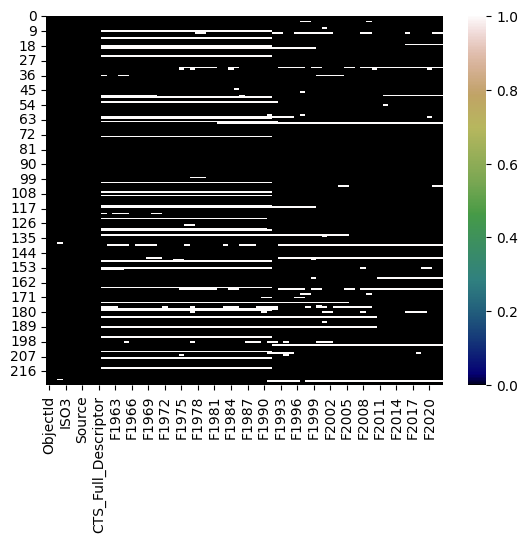

In [ ]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="gist_earth")

We can clearly observe the white lines in the heatmap which indiacte the missing values in dataset

# Treating null values

In [ ]:
df.dropna(how='any',subset=['ISO2'],inplace=True)

As we see ISO2 column has 2 null values using the **dropna** to remove rows from the dataframe

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df[['F1961','F1962','F1963','F1964','F1965','F1966','F1967','F1968','F1969','F1970','F1971','F1972','F1973','F1974','F1975','F1976','F1977'
    ,'F1978','F1979','F1980','F1981','F1982','F1983','F1984','F1985','F1986','F1987','F1988','F1989','F1990','F1991','F1992','F1993','F1994',
    'F1995','F1996','F1997','F1998','F1999','F2000','F2001','F2002','F2003','F2004','F2005','F2006','F2007','F2008','F2009','F2010','F2011',
    'F2012','F2013','F2014','F2015','F2016','F2017','F2018','F2019','F2020','F2021','F2022']]=si.fit_transform(df[['F1961','F1962','F1963','F1964','F1965','F1966','F1967','F1968',
    'F1969','F1970','F1971','F1972','F1973','F1974','F1975','F1976','F1977','F1978','F1979','F1980','F1981','F1982','F1983','F1984','F1985','F1986','F1987','F1988','F1989','F1990','F1991','F1992','F1993','F1994',
    'F1995','F1996','F1997','F1998','F1999','F2000','F2001','F2002','F2003','F2004','F2005','F2006','F2007','F2008','F2009','F2010','F2011',
    'F2012','F2013','F2014','F2015','F2016','F2017','F2018','F2019','F2020','F2021','F2022']])

This code is using SimpleImputer from the sklearn.impute module to fill missing values in the specified columns of a DataFrame with the mean of the non-missing values in those columns.For each of the year columns (F1961 to F2022), the imputer calculates the mean of the non-missing values.



<Axes: >

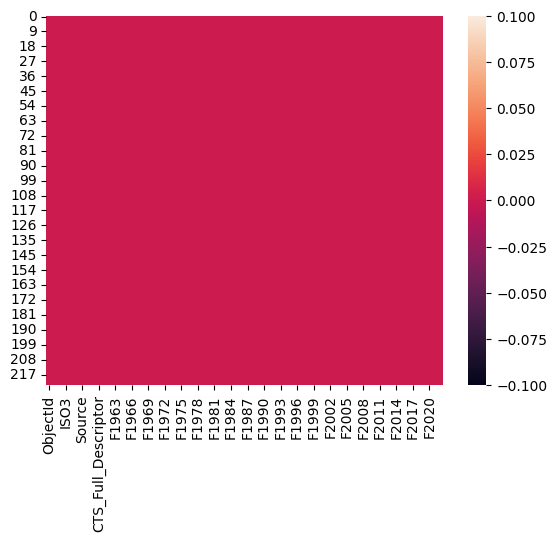

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isna().sum()

,0
ObjectId,0
Country,0
ISO2,0
ISO3,0
Indicator,0
...,...
F2018,0
F2019,0
F2020,0
F2021,0


In [ ]:
# Separting numerical columns
numcol=df.select_dtypes(include=np.number).columns

In [ ]:
numcol

Index(['ObjectId', 'F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966',
       'F1967', 'F1968', 'F1969', 'F1970', 'F1971', 'F1972', 'F1973', 'F1974',
       'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980', 'F1981', 'F1982',
       'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'F1990',
       'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997', 'F1998',
       'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006',
       'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014',
       'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

This shows numerical columns present in the dataset

# Description of Dataset

In [ ]:
# Statistical summary of numerical columns
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,...,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,112.394619,0.162683,-0.013551,-0.007392,-0.069054,-0.248038,0.10500,-0.110545,-0.199460,0.159266,...,0.931607,1.118262,1.269364,1.438318,1.282269,1.303081,1.441265,1.555810,1.349687,1.387474
std,64.951863,0.371762,0.314521,0.355273,0.283629,0.248227,0.35095,0.314048,0.249856,0.284188,...,0.316221,0.554046,0.454702,0.391666,0.384547,0.583047,0.456152,0.602852,0.464111,0.649494
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.80100,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,56.500000,-0.067500,-0.147000,-0.167000,-0.212500,-0.363500,-0.00850,-0.252000,-0.287500,0.024000,...,0.749000,0.764500,1.029000,1.163000,1.040500,0.879500,1.173500,1.188500,1.030000,0.902500
50%,112.000000,0.144000,-0.024000,-0.007392,-0.069054,-0.248038,0.10500,-0.110545,-0.199460,0.159266,...,0.922000,1.011000,1.232000,1.438318,1.282269,1.149000,1.430000,1.498000,1.349687,1.346000
75%,168.500000,0.254500,0.083000,0.174000,0.099500,-0.113500,0.23950,-0.039000,-0.092000,0.306500,...,1.182500,1.314000,1.516000,1.693500,1.517000,1.634500,1.671500,1.780500,1.597000,1.885500
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.15100,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


# Data Visualization

In [ ]:
# Assuming df is your original dataframe
years = [f'F{year}' for year in range(1961, 2023)]  # Columns from F1961 to F2022
long_df = pd.melt(df, id_vars=['Country','ISO2', 'ISO3'], value_vars=years, var_name='Year', value_name='Value')

# Convert 'Year' from 'F1961' to integer format (1961, 1962, ..., 2022)
long_df['Year'] = long_df['Year'].str[1:].astype(int)

First, the code creates a list of columns representing the years (F1961 to F2022) using a list comprehension. Then, the pd.melt() function is applied to the dataset to collapse all year columns into a single column named "Year" and their corresponding values into a column named "Value." The columns "Country," "ISO2," and "ISO3" remain as identifiers in the reshaped dataframe. After that, the "Year" column (which initially contains values like 'F1961', 'F1962') is cleaned by removing the leading 'F' and converting the remaining year strings into integers (1961, 1962, etc.).

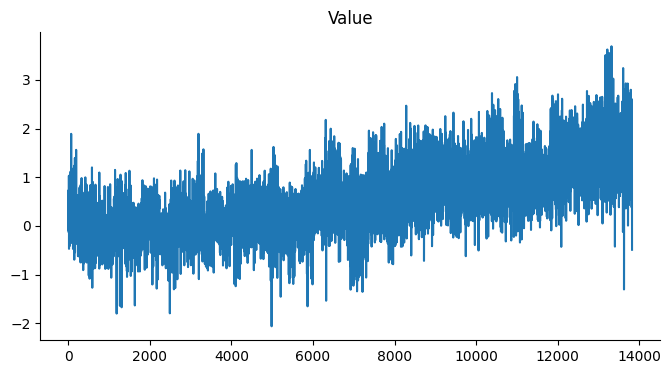

In [ ]:
# Line plotting for temperature chaanging over time
from matplotlib import pyplot as plt
long_df['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

From the above line plot we can observe how the climate-related indicator values (such as temperature or other measurements) change over time. Each point on the line represents the value of the indicator for a specific year across all countries, and the line connects these points to show the trend over time.

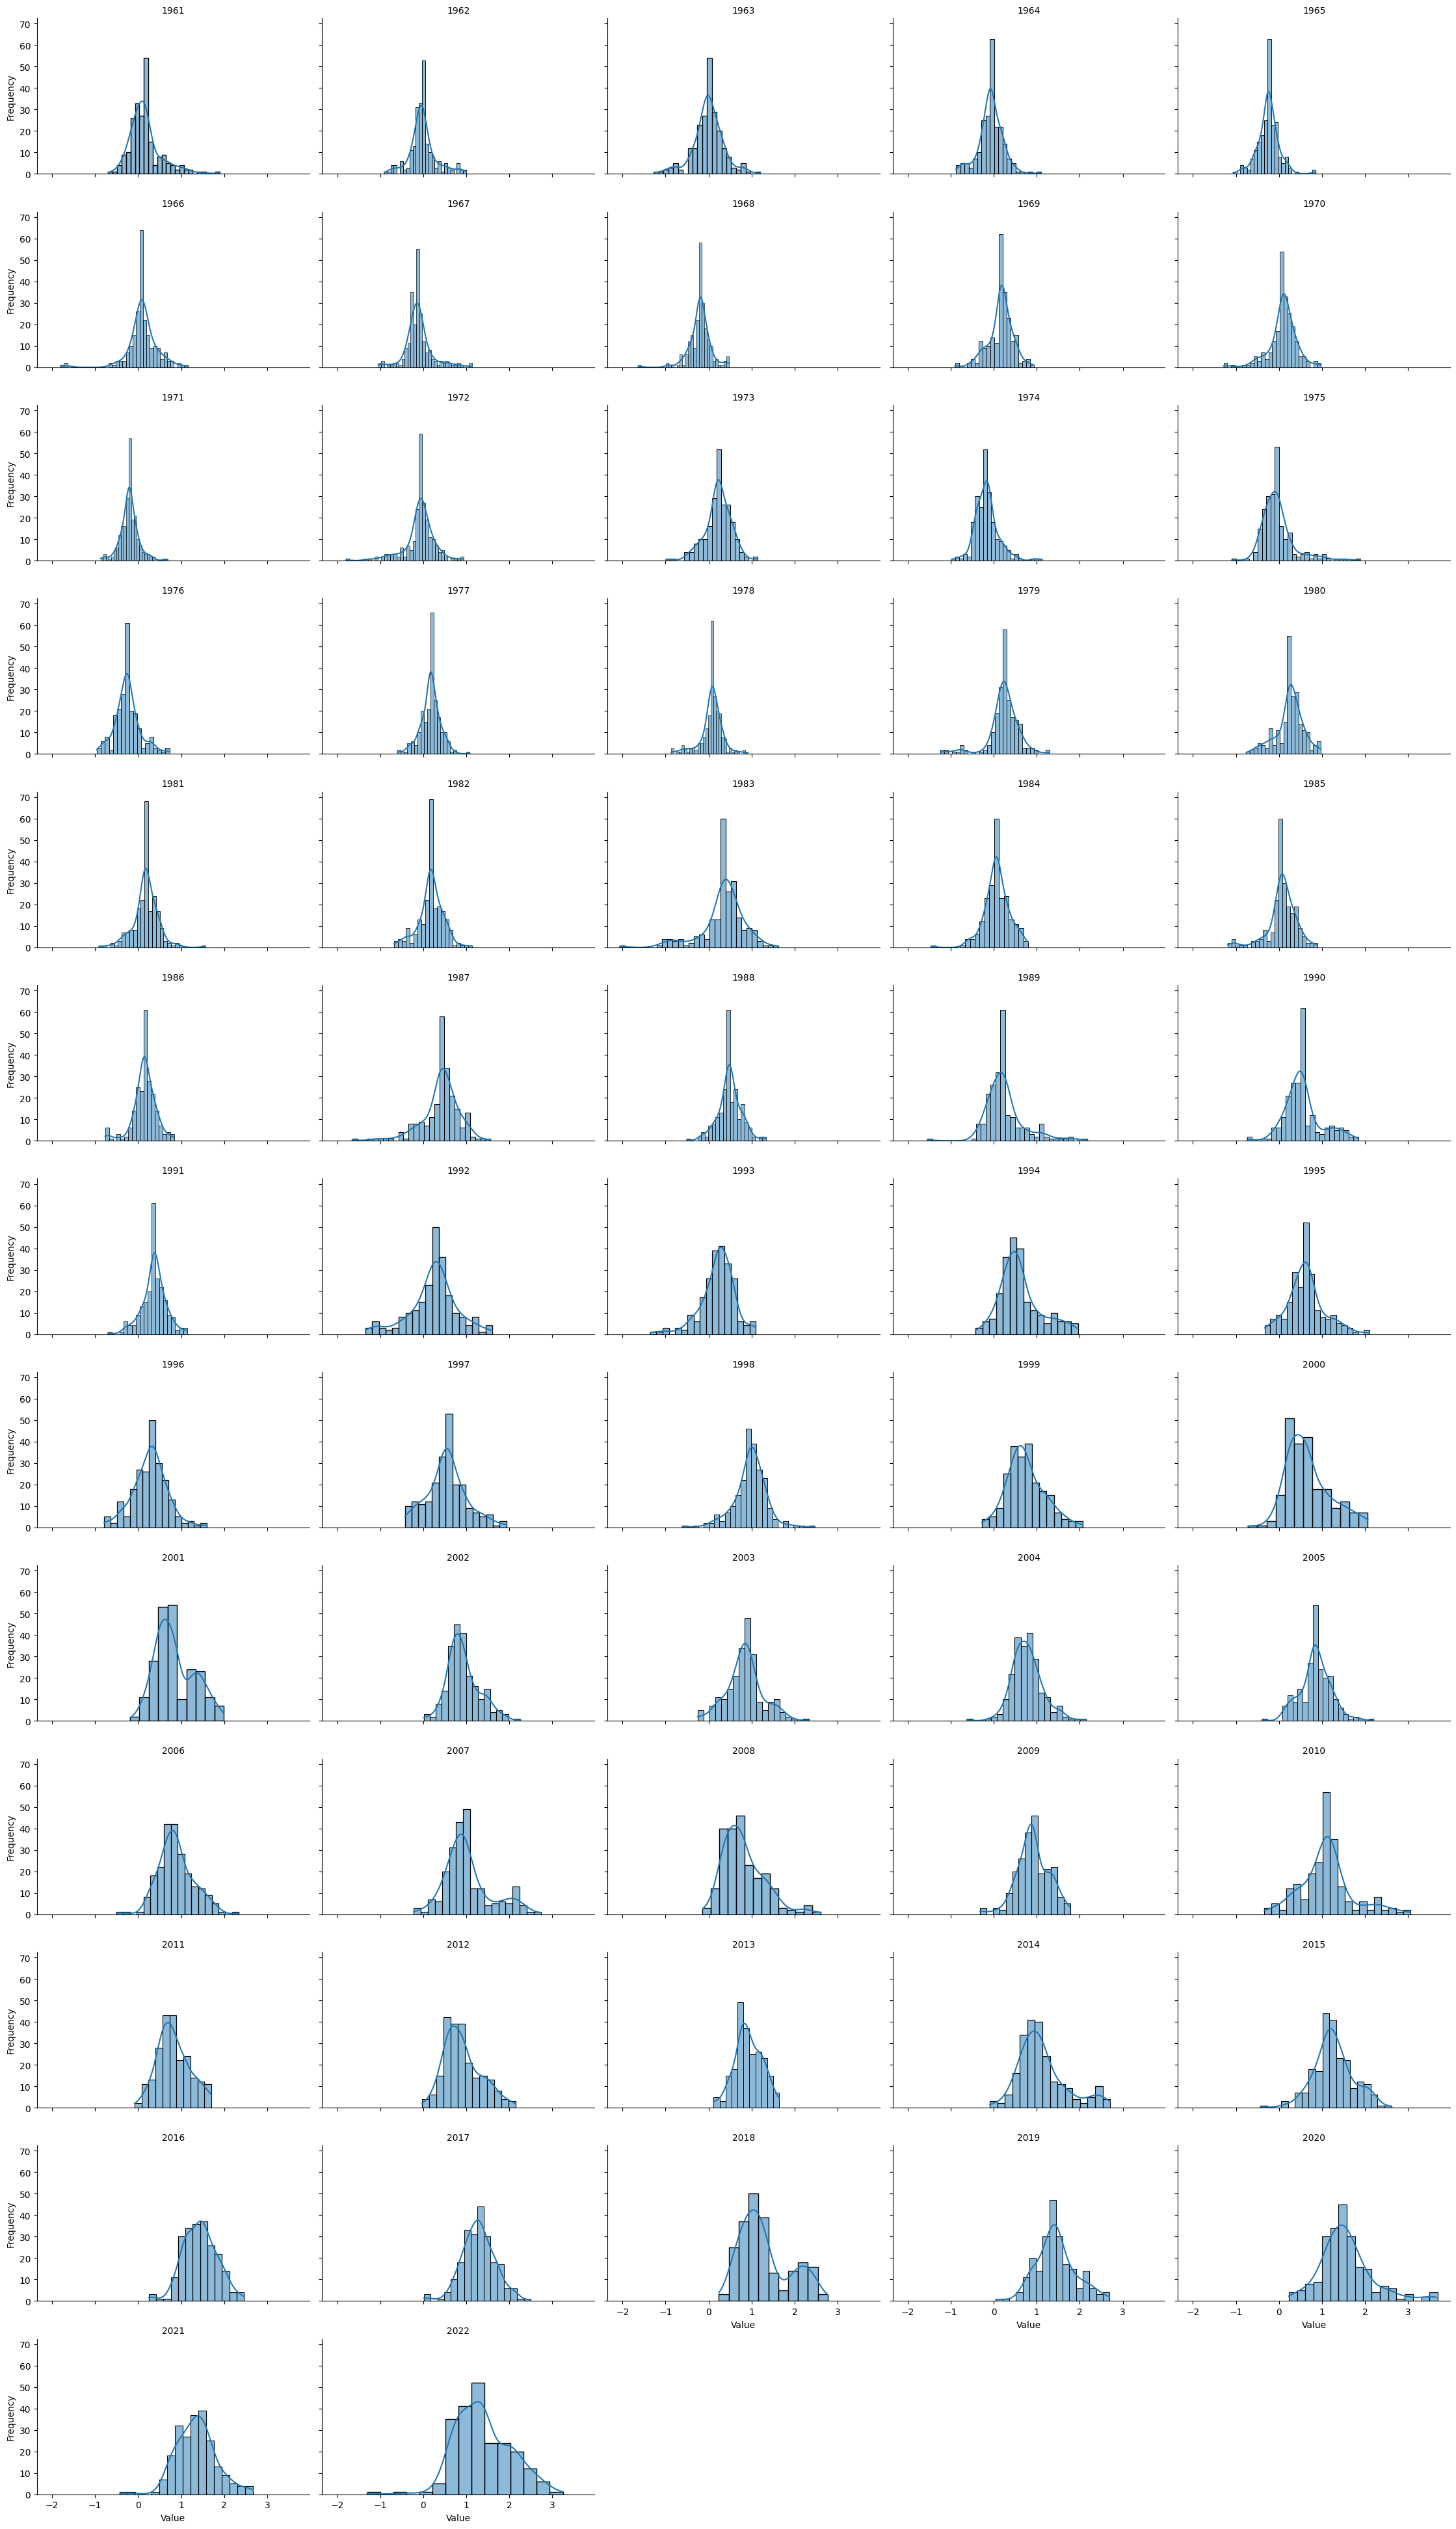

In [ ]:
# distribution plot for each year
# Set the figure size
g = sns.FacetGrid(long_df, col='Year', col_wrap=5, height=3, aspect=1.5)

# Create a histogram with KDE for each year
g.map(sns.histplot, 'Value', kde=True)

# Set plot titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Value', 'Frequency')

# Show the plot
plt.tight_layout()
plt.show()


* From the above distribution plot we can observe that the data is almost normal
* Most of the distributions appear to have a tall, sharp peak, suggesting that the data for those years has less variance around the mean.
* Some small tails on either side of the distribution curves in some years, which could represent outliers or less frequent values


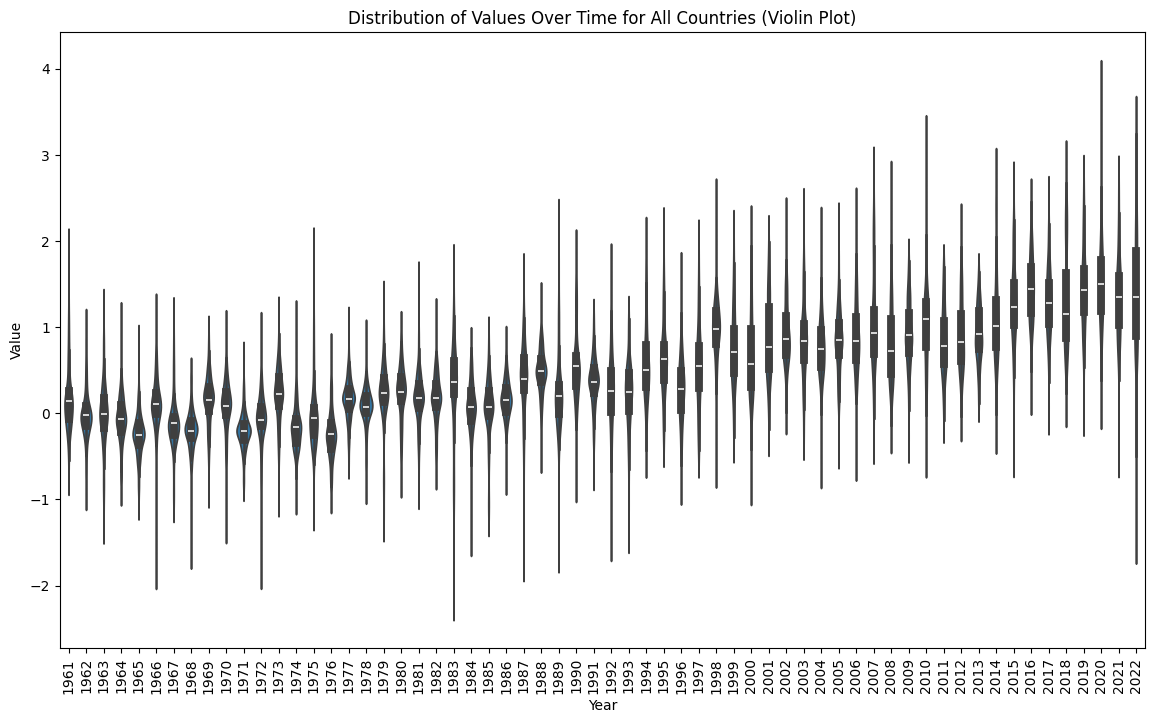

In [ ]:
# Distribution of Values Over Time for All Countries
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='Value', data=long_df)
plt.title('Distribution of Values Over Time for All Countries (Violin Plot)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

* The violin plot shows how the values for countries have changed from 1961 to 2022. We can see that, on average, the values have increased over the years.
* The shape of the violins is often wide and has two peaks, which suggests that there are two main groups of countries with different value ranges, possibly rich and poor countries.
* Some years have a wider shape, indicating more countries are clustered around certain values, while others are narrower, showing less variation.
* There are also some years with long tails, indicating that a few countries have extremely high or low values compared to others.

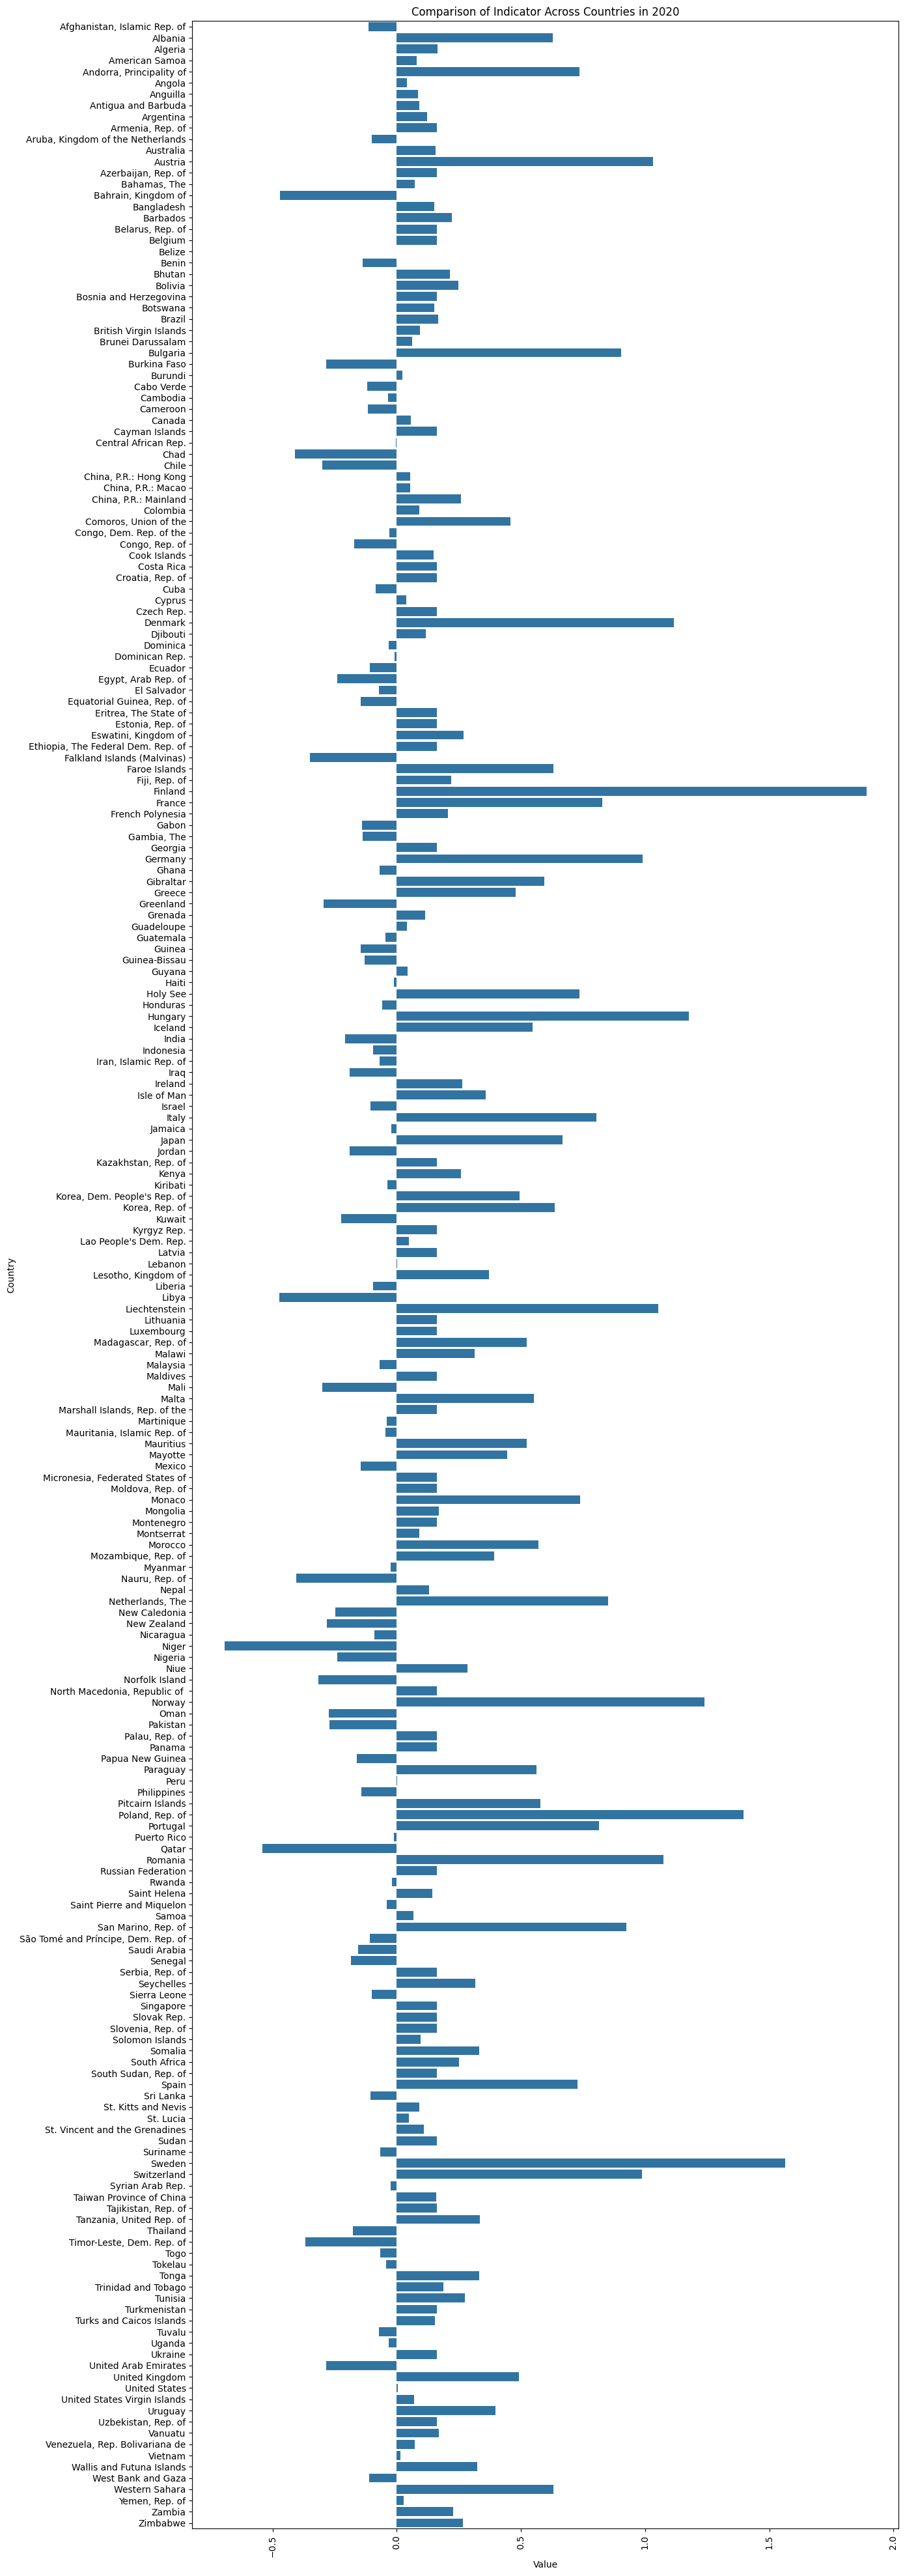

In [ ]:
plt.figure(figsize=(14, 50))
sns.barplot(data=long_df[long_df['Year'] ==1961], y='Country', x='Value')
plt.title('Comparison of Indicator Across Countries in 2020')
plt.xticks(rotation=90)
plt.show()

* In this bar plot, we can observe a comparative analysis of a specific indicator across various countries for the year 1961.
* The values for the indicator vary significantly across countries. Some countries have high values, while others have much lower values

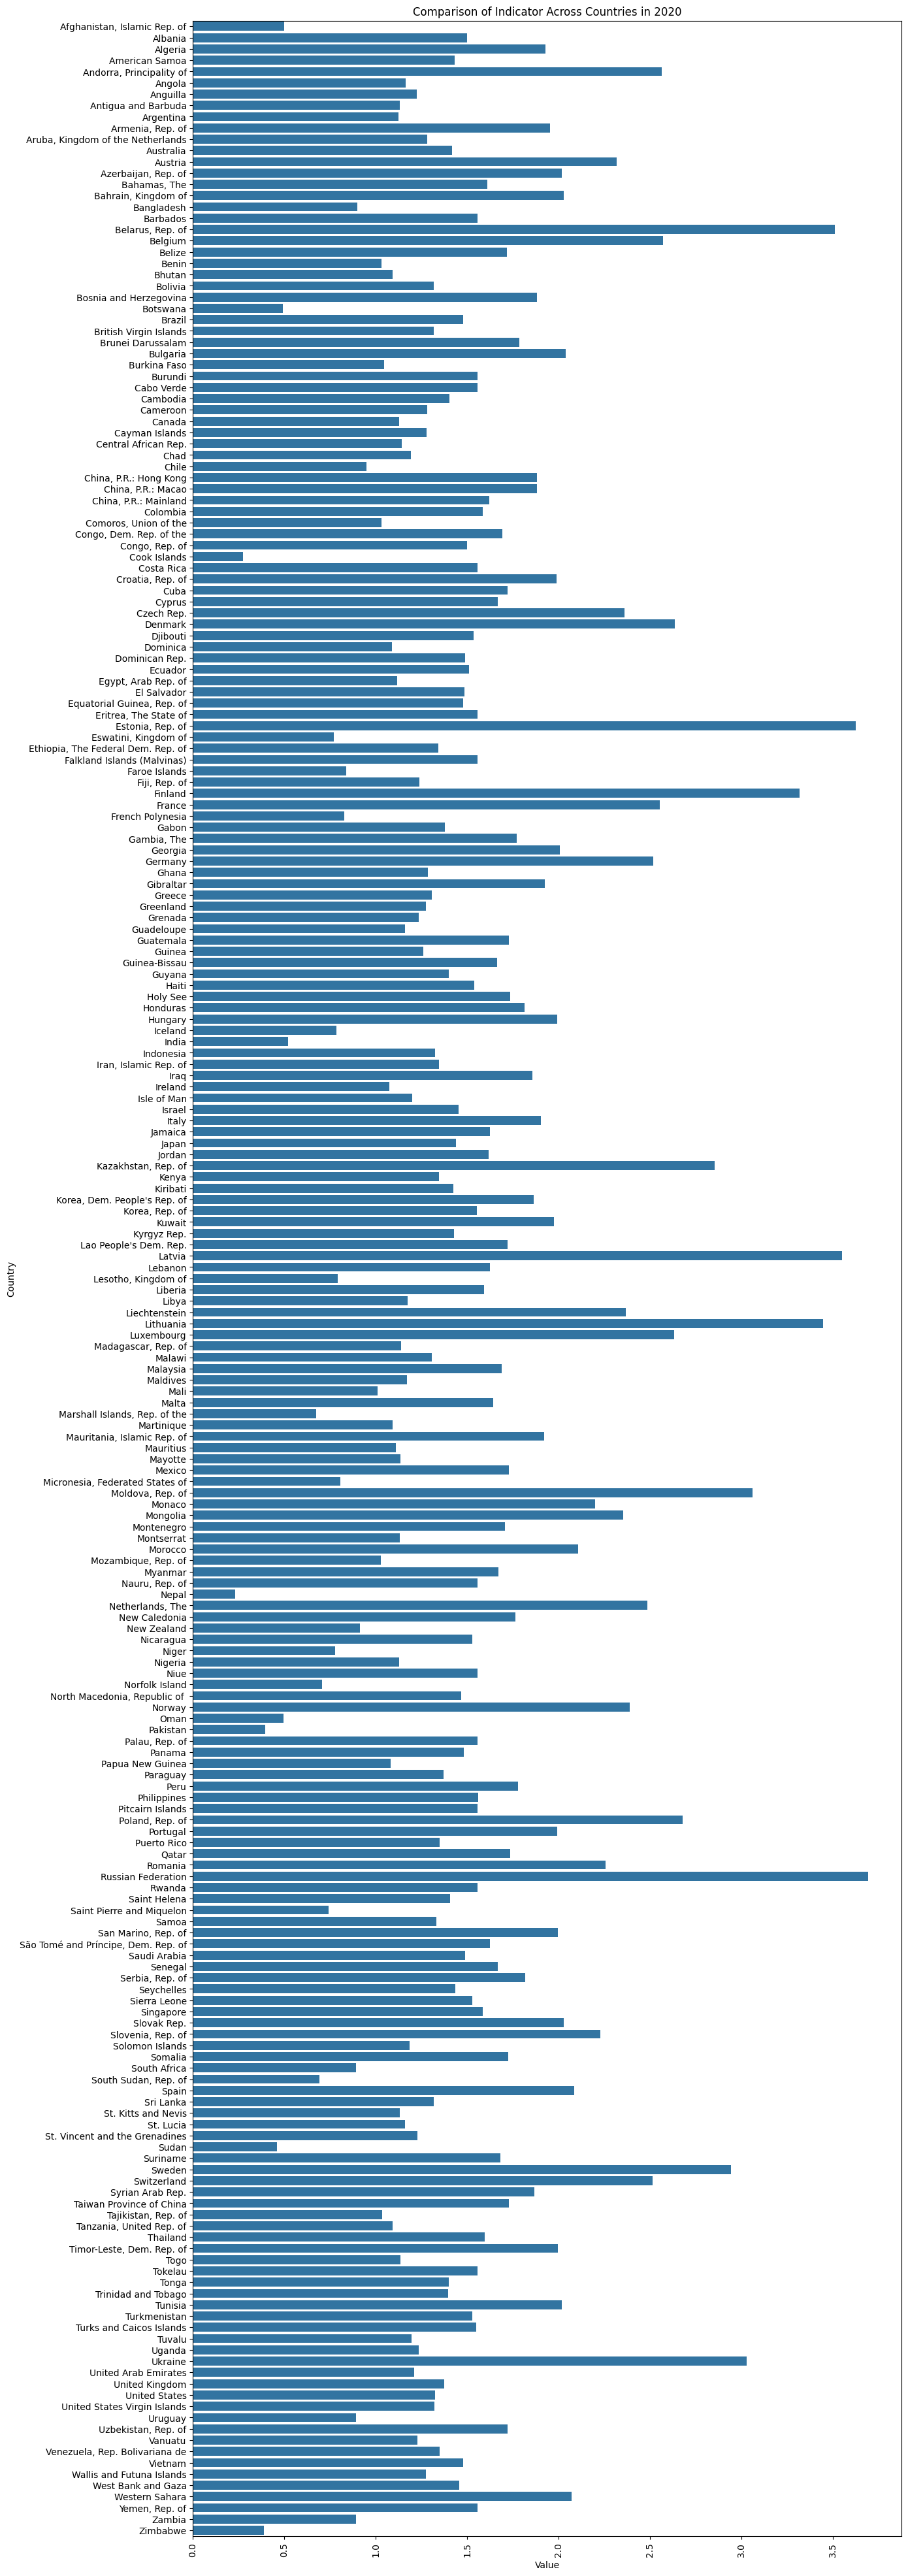

In [ ]:
plt.figure(figsize=(14, 50))
sns.barplot(data=long_df[long_df['Year'] == 2020], y='Country', x='Value')
plt.title('Comparison of Indicator Across Countries in 2020')
plt.xticks(rotation=90)
plt.show()

* In this bar plot, we can observe a comparative analysis of a specific indicator across various countries for the year 2020.
* The values for the indicator vary significantly across countries. Some countries have high values, while others have much lower values
* In the previous bar plot we observe,in 1961 every country climate is less compertively 2022

In [ ]:
# Group by 'Country' and calculate the mean value for each country
country_means = long_df.groupby('Country')['Value'].mean().sort_values(ascending=False)

# Select the top 5 countries based on the mean value
top_5_countries = country_means.head(5).index.tolist()

# Filter the dataframe to only include the top 5 countries
top_5_df = long_df[long_df['Country'].isin(top_5_countries)]


* The line long_df.groupby('Country')['Value'].mean() groups the dataset long_df by the 'Country' column. It then calculates the mean of the 'Value' column for each country, effectively finding the average value associated with each country.
* The .sort_values(ascending=False) sorts the countries in descending order of their mean values. This ensures that countries with higher average values appear first in the list.
* The country_means.head(5).index.tolist() selects the first five countries with the highest average values. These countries are stored in the list top_5_countries.

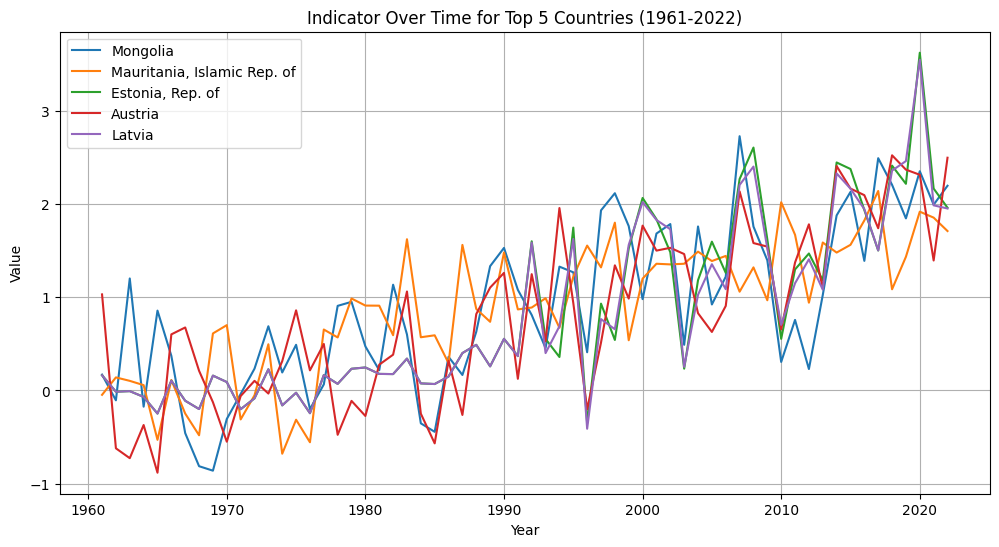

In [ ]:
# Plot the line chart for the top 5 countries
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = top_5_df[top_5_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.title('Indicator Over Time for Top 5 Countries (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()

* In this line plot, we observe the trends in the indicator values over time (from 1961 to 2022) for the top 5 countries: Mongolia, Mauritania, Estonia, Austria, and Latvia.
* while all five countries show volatility in the indicator values, Estonia and Mongolia stand out with significant recent growth, whereas Austria and Latvia display more stability over the period.


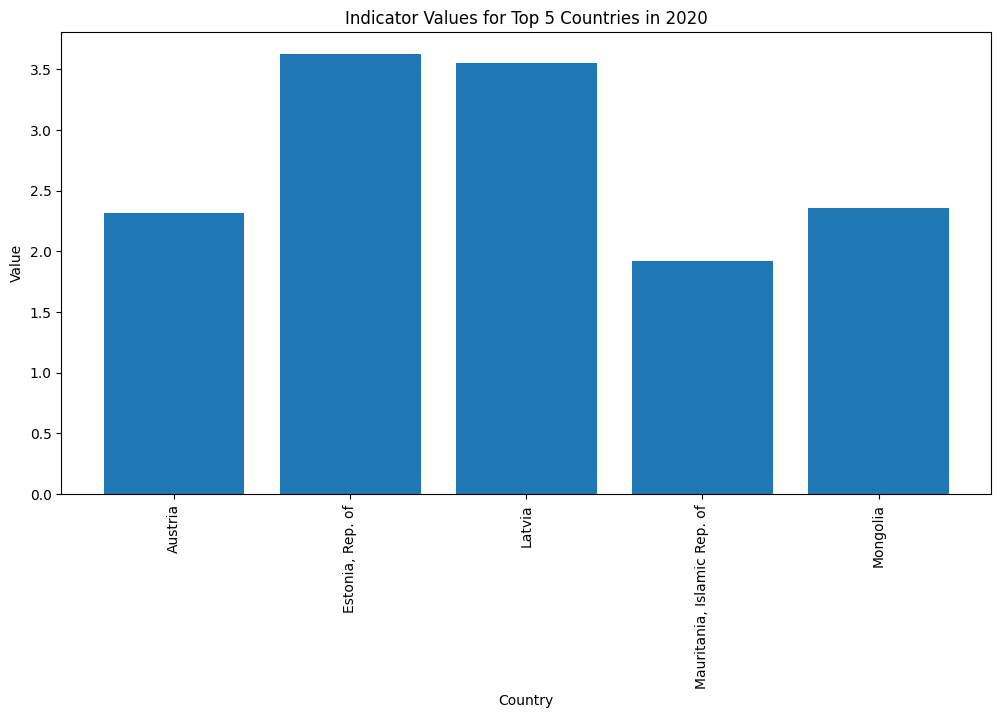

In [ ]:
# Filter the data for a specific year (e.g., 2020)
df_2020 = top_5_df[top_5_df['Year'] == 2020]

plt.figure(figsize=(12, 6))
plt.bar(df_2020['Country'], df_2020['Value'])
plt.title('Indicator Values for Top 5 Countries in 2020')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

* In this bar plot, we observe the indicator values for the top 5 countries in the year 2020: Austria, Estonia, Latvia, Mauritania, and Mongolia.
* Latvia has the highest indicator value in 2020, with a value slightly above 3.5
* Austria and Mongolia these two countries have similar indicator values, around 2.5, showing moderate levels compared to the others.
*  Mauritania has the lowest indicator value in 2020, below 2.0, indicating a relatively lower performance compared to the other four countries.

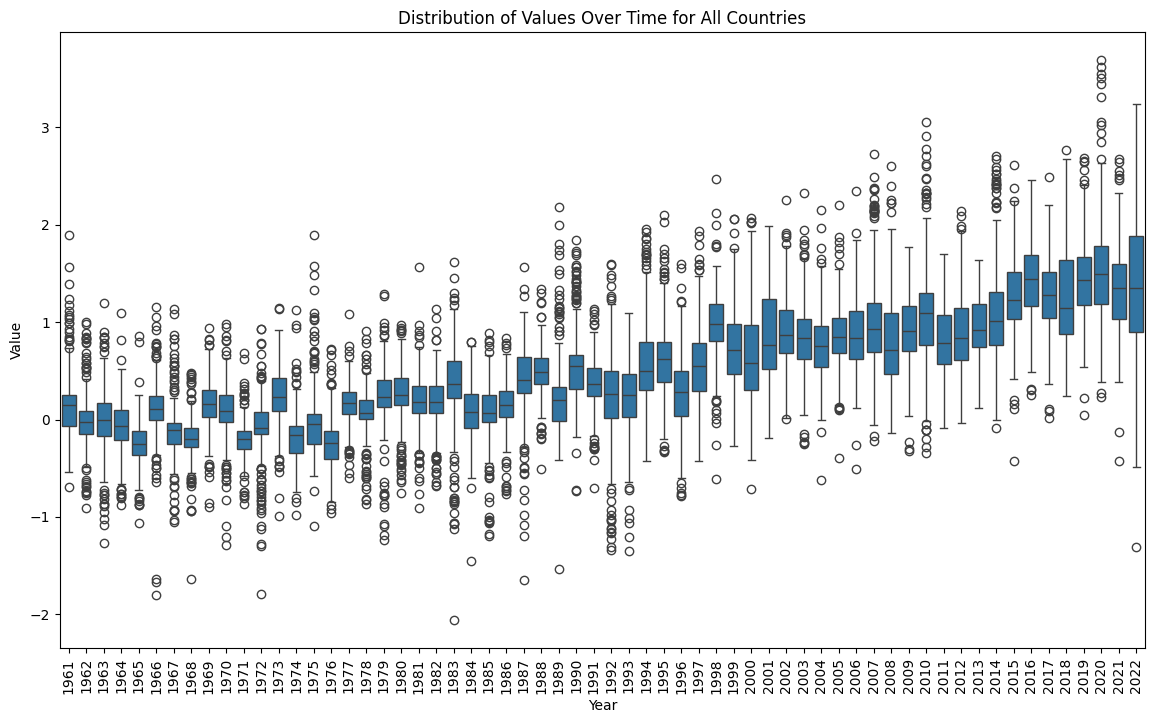

In [ ]:
#Let's check the outlier by plotting Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Value', data=long_df)
plt.title('Distribution of Values Over Time for All Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


We can find the outlier in every columns. These are numerical columns which contain outlier.Let's remove outlier in these columns using either zscore method or IQR Method


# Removing Outliers

1. Zscore Method

In [ ]:
# Feature Containing Outlier
features=long_df[['Year','Value']]
# Using zscore to remove outlier
from scipy.stats import zscore
z=np.abs(zscore(features))

z

,Year,Value
0,1.704336,0.979180
1,1.704336,0.177494
2,1.704336,0.546208
3,1.704336,0.679070
4,1.704336,0.347869
...,...,...
13821,1.704336,0.876188
13822,1.704336,2.276701
13823,1.704336,1.366170
13824,1.704336,0.269716


Now we have removed the outlier

In [ ]:
# Creating New Dataframe
newdf=long_df[(z<=3).all(axis=1)]
newdf

,Country,ISO2,ISO3,Year,Value
0,"Afghanistan, Islamic Rep. of",AF,AFG,1961,-0.113000
1,Albania,AL,ALB,1961,0.627000
2,Algeria,DZ,DZA,1961,0.164000
3,American Samoa,AS,ASM,1961,0.079000
4,"Andorra, Principality of",AD,AND,1961,0.736000
...,...,...,...,...,...
13821,West Bank and Gaza,PS,PSE,2022,1.074000
13822,Western Sahara,EH,ESH,2022,1.970000
13823,"Yemen, Rep. of",YE,YEM,2022,1.387474
13824,Zambia,ZM,ZMB,2022,0.686000


This is the new dataframe after removing the outlier.Here we have removed the outlier whose Zscore is less than 3

In [ ]:
# Shape of original Dataset
long_df.shape

(13826, 5)

Before removing outlier we had 13826 rows and 5 columns

In [ ]:
 # Shape of new dataframe
 newdf.shape

(13740, 5)

After removing outlier there are 13740 rows and 5 columns

In [ ]:
dataloss=((13826-13740)/13826)*100
dataloss

0.6220164906697526

Here we are losing very less data hence removing outlier
Lets remove the outlier and check data loss using IQR Method

# 2. IQR (Inter Quantile Range) method

In [ ]:
# Assuming `features` is the subset of numerical columns you are analyzing
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame to remove outliers across all numerical columns
df1 = long_df[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df1.shape

(13629, 5)

Using IQR Method the dataframe has 13629 rows 5 columns:*italicized text*

In [ ]:
dataloss1=((13826-13629)/13826)*100
dataloss1

1.424851728627224

Using IQR method also the data loss is very less.But compared to Zscore the dataloss is high in IQR, so let's consider Zscore method

# Removing skewness using yeo-johnson Method

In [ ]:
skew1=['Value','Year']
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer(method='yeo-johnson')
newdf[skew1]=PT.fit_transform(newdf[skew1])

In [ ]:
# Checking the skewness after using yeo-johnson method
newdf[skew1].skew()

,0
Value,-0.023380
Year,-0.001548


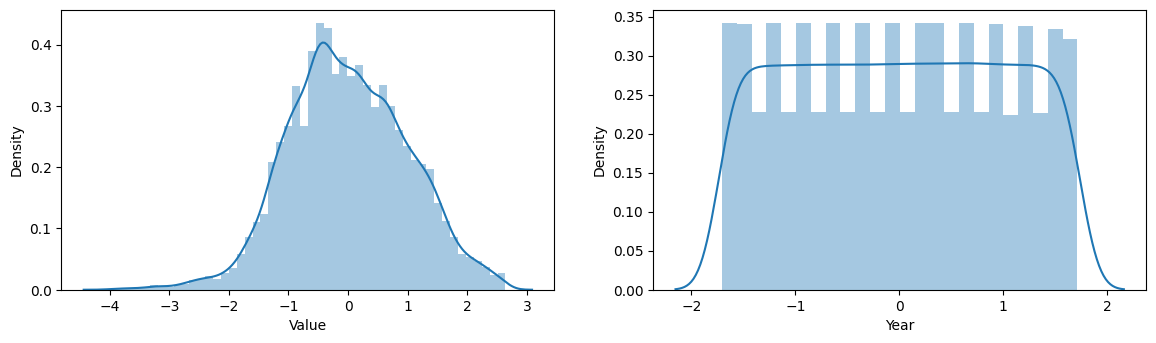

In [ ]:
plt.figure(figsize=(14, 8))
plotnumber=1
for column in newdf[skew1]:
    if plotnumber<=9:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(newdf[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Encoding the categorical columns using

In [ ]:
catcol=newdf.select_dtypes('object').columns
catcol

Index(['Country', 'ISO2', 'ISO3'], dtype='object')

This shows all categorical columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
newdf[catcol]=OE.fit_transform(newdf[catcol])

The categorical columns have been conveted into numerical columns by using ordinalEncoder

# Separting the feature and Label Variable into x and y

In [ ]:
x=newdf.iloc[:,:-1]

In [ ]:
y=newdf.iloc[:,-1]

We have separted both dependent and independent variable

In [ ]:
x.shape

(13740, 4)

In [ ]:
y.shape

(13740,)

# Split Train and Test Set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)


Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

# Regression Algorithms

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
r=RandomForestRegressor()
r.fit(xtrain,ytrain)
#prediction
predRFR=r.predict(xtest)
rf1=r2_score(ytest,predRFR)
print("R2 Score:",rf1)
print("MAE:",metrics.mean_absolute_error(ytest,predRFR))
print("MSE:",metrics.mean_squared_error(ytest,predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predRFR)))

R2 Score: 0.6299640699837753
MAE: 0.44407224521314426
MSE: 0.3737708815008758
RMSE: 0.611368040954772


<Axes: xlabel='Value'>

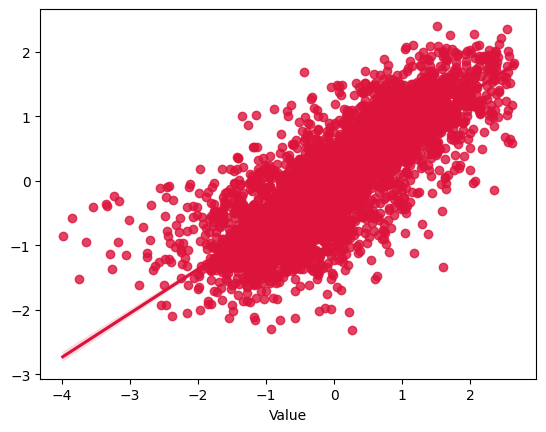

In [ ]:
sns.regplot(x=ytest,y=predRFR,color='crimson')

We have created Random Forest Regressor and checked the evalution metrics.The predicated R2 Score for Random Forest Regressor is 63.45%

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

R2 Score: 0.6299640699837753
MAE: 0.6022382839142366
MSE: 0.6807893940732463
RMSE: 0.8250996267562156


<Axes: xlabel='Value'>

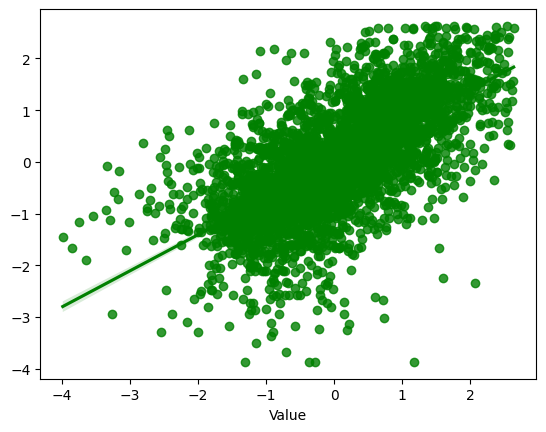

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(xtrain,ytrain)
#prediction
predDTR=DT.predict(xtest)
dt1=r2_score(ytest,predRFR)
print("R2 Score:",dt1)
print("MAE:",metrics.mean_absolute_error(ytest,predDTR))
print("MSE:",metrics.mean_squared_error(ytest,predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predDTR)))

sns.regplot(x=ytest,y=predDTR,color='g')

We have created Decision Tree Regressor and checked the evalution metrics.The predicated R2 Score for Decision Tree Regressor is 63.45%

# GradientBoosting Regressor

R2 Score: 0.6263957950947063
MAE: 0.44521149099636376
MSE: 0.377375172712992
RMSE: 0.6143086949677596


<Axes: xlabel='Value'>

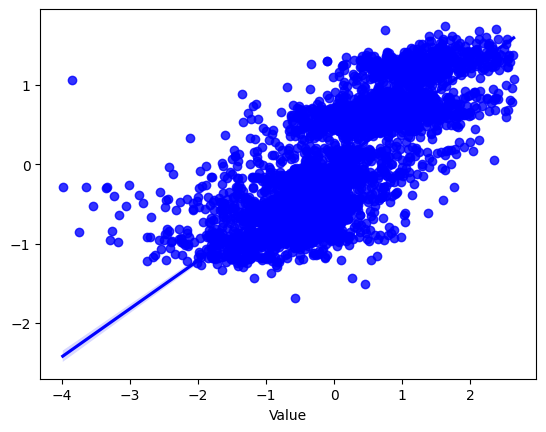

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(xtrain,ytrain)
#Prediction
predGB=GB.predict(xtest)
gb2=r2_score(ytest,predGB)
print("R2 Score:",gb2)
print("MAE:",metrics.mean_absolute_error(ytest,predGB))
print("MSE:",metrics.mean_squared_error(ytest,predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predGB)))
sns.regplot(x=ytest,y=predGB,color='b')

We have created GradientBoosting Regressor and checked the evalution metrics.The predicated R2 Score for GradientBoosting Regressor is 62.63%

# Bagging Regressor

R2 Score: 0.6032475076914977
MAE: 0.4614331956197988
MSE: 0.40075710696881833
RMSE: 0.6330537946879541


<Axes: xlabel='Value'>

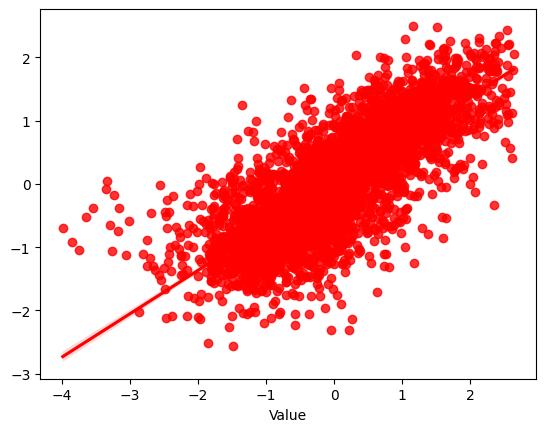

In [ ]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(xtrain,ytrain)
#Prediction
predBR=BR.predict(xtest)
br1=r2_score(ytest,predBR)
print("R2 Score:",br1)
print("MAE:",metrics.mean_absolute_error(ytest,predBR))
print("MSE:",metrics.mean_squared_error(ytest,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predBR)))
sns.regplot(x=ytest,y=predBR,color='r')

We have created Bagging Regressor and checked the evalution metrics.The predicated R2 Score for Bagging Regressor is 60.19%

# XGB Regressor

R2 Score: 0.6701184240153275
MAE: 0.407417984201287
MSE: 0.3332112301669811
RMSE: 0.5772445150601097


<Axes: xlabel='Value'>

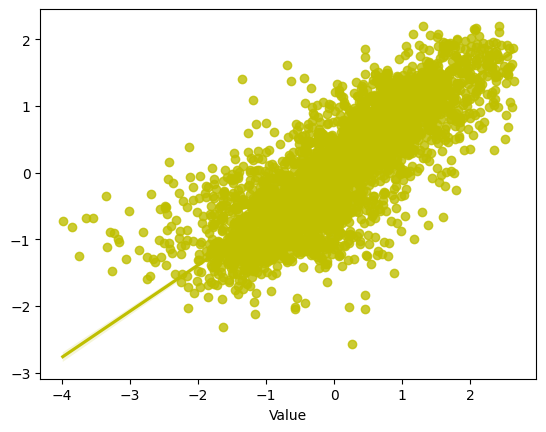

In [ ]:
from xgboost import XGBRegressor as xgb
XGB=xgb()
XGB.fit(xtrain,ytrain)
#Prediction
predXGB=XGB.predict(xtest)
xgb1=r2_score(ytest,predXGB)
print("R2 Score:",xgb1)
print("MAE:",metrics.mean_absolute_error(ytest,predXGB))
print("MSE:",metrics.mean_squared_error(ytest,predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predXGB)))
sns.regplot(x=ytest,y=predXGB,color='y')

We have created XGB Regressor and checked the evalution metrics.The predicated R2 Score for XGB Regressor is 60.01%

# ExtraTrees Regressor

R2 Score: 0.5559196245364766
MAE: 0.4974788304547078
MSE: 0.4485626933226815
RMSE: 0.6697482312949259


<Axes: xlabel='Value'>

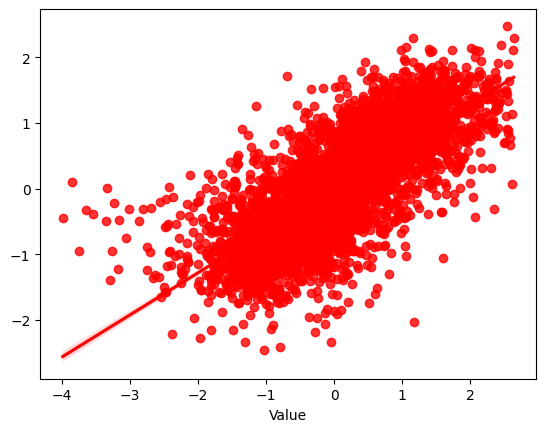

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
XT=ExtraTreesRegressor()
XT.fit(xtrain,ytrain)
predXT=XT.predict(xtest)
etr1=r2_score(ytest,predXT)
print("R2 Score:",etr1)
print("MAE:",metrics.mean_absolute_error(ytest,predXT))
print("MSE:",metrics.mean_squared_error(ytest,predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predXT)))
sns.regplot(x=ytest,y=predXT,color='r')

In [ ]:
We have created Extra Trees Regressor and checked the evaluation metrics. The predicted R2 score for Extra Trees Regressor is 55.59%.


 # Checking the cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Checking cv score for Random Forest Regressor
rf_cv=cross_val_score(r,x,y,cv=5).mean()
print(rf_cv)

-0.6058524254792188


In [ ]:
# Checking cv score for Decision Tree Regressor
dtcv=cross_val_score(DT,x,y,cv=5).mean()
print(dtcv)

-0.9563936023328925


In [ ]:
# Checking cv score for Gradient Boosting Regressor
gbcv=cross_val_score(GB,x,y,cv=5).mean()
print(gbcv)

-0.22619840346387604


In [ ]:
# Checking cv score for Bagging Regressor
br_cv=cross_val_score(BR,x,y,cv=5).mean()
print(br_cv)

-0.5438905609351948


In [ ]:
# Checking cv score for XGBRegressor
xgbcv=cross_val_score(XGB,x,y,cv=5).mean()
print(xgbcv)

-0.4448660467753351


In [ ]:
# Checking cv score for ExtraTreesRegressor
excv=cross_val_score(XT,x,y,cv=5).mean()
print(excv)

-0.485063682738461


In [ ]:
Model_list=['Random Forest Regressor','Decision Tree Regressor','Gradient Boosting Regressor','Bagging Regressor','XGB Regressor','Extra Trees Regressor']

In [ ]:
accuracyscore1=[rf1,dt1,gb2,br1,xgb1,etr1]

In [ ]:
crossval=[rf_cv,dtcv,gbcv,br_cv,xgbcv,excv]

In [ ]:
models1=pd.DataFrame({})
models1['Regressor']=Model_list
models1['Accuracy Score']=accuracyscore1
models1['Cross Val Score']=crossval

In [ ]:
models1

,Regressor,Accuracy Score,Cross Val Score
0,Random Forest Regressor,0.629964,-0.605852
1,Decision Tree Regressor,0.629964,-0.956394
2,Gradient Boosting Regressor,0.626396,-0.226198
3,Bagging Regressor,0.603248,-0.543891
4,XGB Regressor,0.670118,-0.444866
5,Extra Trees Regressor,0.555920,-0.485064


Above are the cross validation score for the models that we have used.

From the differences between the R2 score and Cross Validation Score we can conclude that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramter={'n_estimators':[50,100,200,400],
          'max_depth':[4,6,8,10],
          'gamma':np.arange(0,0.5,0.1),
          'n_jobs':[-2,-1,1]}

These are the parameters of XGB Regressor.

In [ ]:
GCV=GridSearchCV(xgb(),paramter,cv=5)

Running GridSearchCV for XGB Regressor.

In [ ]:
GCV.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200, 400],
                         'n_jobs': [-2, -1, 1]})

In [ ]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 4, 'n_estimators': 200, 'n_jobs': -2}

R2_Score 0.6701184240153275
MAE 0.407417984201287
MSE 0.3332112301669811
RMSE 0.5772445150601097


<Axes: xlabel='Value'>

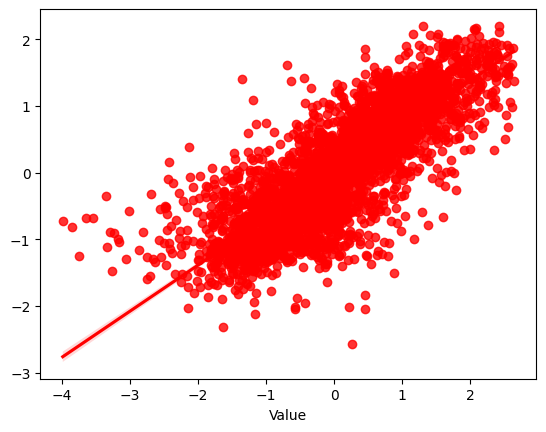

In [ ]:
Final_model2=xgb(gamma=0.0,max_depth=6,n_estimator=400,n_jobs=-2)
Final_model2.fit(xtrain,ytrain)
pred=Final_model2.predict(xtest)
print('R2_Score',r2_score(ytest,pred))
print('MAE',metrics.mean_absolute_error(ytest,pred))
print('MSE',metrics.mean_squared_error(ytest,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(ytest,pred)))
sns.regplot(x=ytest,y=pred,color='r')

Great!!!...After hyper parameter tuning our best model accuracy increased and is giving 67.01% which is good.